In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lls import LinearLeastSquare

In [2]:
data  = pd.read_csv("HousePrice.csv")
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
# preprocessing
data['Parking'].replace(['True', 'False'], [0, 1], inplace=True)
data['Warehouse'].replace(['True', 'False'], [0, 1], inplace=True)
data['Elevator'].replace(['True', 'False'], [0, 1], inplace=True)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [6]:
data.drop('Address', axis=1, inplace=True)

In [7]:
data.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.672959,0.197698,0.076829,0.052384,0.722647,0.722647
Room,0.672959,1.000000,0.274952,0.129956,0.181718,0.567610,0.567610
Parking,0.197698,0.274952,1.000000,0.430804,0.430893,0.190532,0.190532
Warehouse,0.076829,0.129956,0.430804,1.000000,0.201921,0.109971,0.109971
Elevator,0.052384,0.181718,0.430893,0.201921,1.000000,0.111861,0.111861
Price,0.722647,0.567610,0.190532,0.109971,0.111861,1.000000,1.000000
Price(USD),0.722647,0.567610,0.190532,0.109971,0.111861,1.000000,1.000000


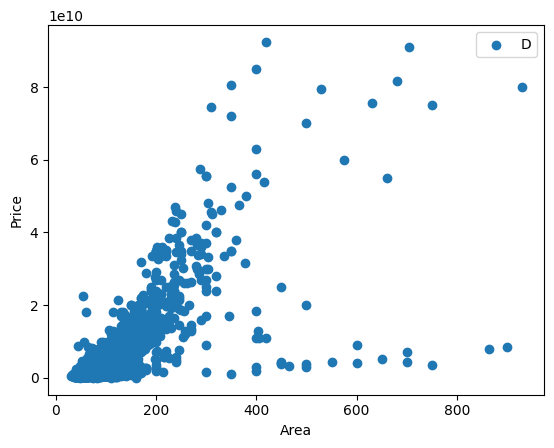

In [8]:
plt.scatter(data['Area'], data['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend('Data')
plt.show()

In [9]:
x = np.array(data[['Area']])
y = np.array(data[['Price']])

print(x.shape)
print(y.shape)

(3473, 1)
(3473, 1)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2604, 1)
(2604, 1)
(869, 1)
(869, 1)


In [11]:
lls = LinearLeastSquare()
lls.fit(x_train, y_train)

y_pred = lls.predict(x_test)

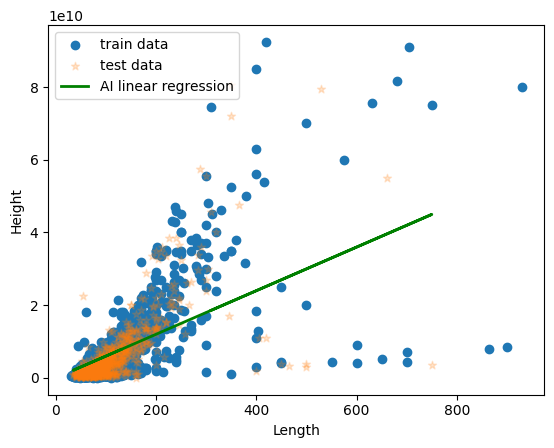

In [12]:
plt.scatter(x_train, y_train, marker='o')
plt.scatter(x_test, y_test, marker='*', alpha=0.2)
plt.plot(x_test, y_pred, color= 'green', lw=2) 
plt.xlabel('Length')
plt.ylabel('Height')
plt.legend(['train data', 'test data', 'AI linear regression', 'manual linear regression'], loc='upper left')
plt.show()

In [13]:
lls.evaluate(x_test, y_test, 'mae')

3556714057.521964